<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/mlCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import scipy
from sklearn.metrics import mean_absolute_error, mean_squared_error

from matplotlib.legend_handler import HandlerTuple
plt.set_loglevel("WARNING")

In [2]:
# set up color palette
palett = sns.color_palette(n_colors=8)
palett_as_hex = palett.as_hex()

c1, c2, c3, c4, c5, c7 = (
    palett_as_hex[0],
    palett_as_hex[1],
    palett_as_hex[2],
    palett_as_hex[3],
    palett_as_hex[4],
    palett_as_hex[6],
)
c8 = matplotlib.colors.to_rgba("k", alpha=0.1)
c8_2 = matplotlib.colors.to_rgba("k", alpha=0.01)
# c5 = lila
# c7= rosa

In [3]:
# data = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/combined_EXS_and_UV_dataset.csv")
data = pd.read_csv("sample_data/EXS_and_UV.csv")
# data = data.dropna(subset=["dG (corrected)"])

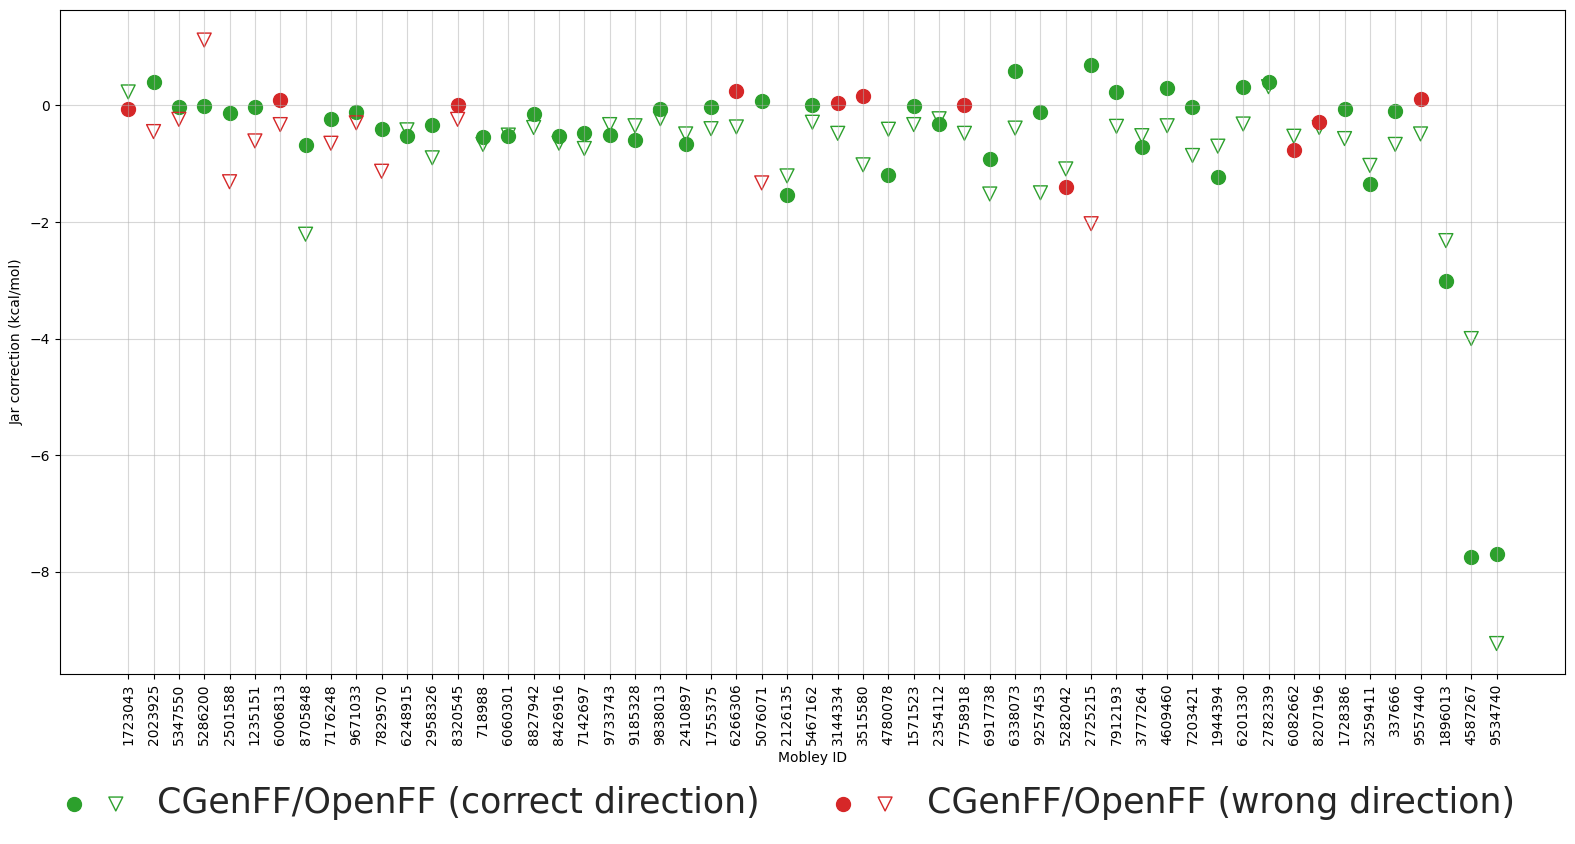

In [4]:
# data = data.dropna(subset=["Crooks result"])
fig, axs = plt.subplots(1, 1, figsize=(16, 8))


data = data.sort_values(by="Exp [kcal/mol]", ascending=False)

sns.set_theme(
    style="white",
    rc={
        "font.size": 15,
        "legend.fontsize": 25,
        "lines.markersize": 10,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
    },
)

wrongDirection = []
for index, row in data.iterrows():
    if not np.isnan(data["Exp [kcal/mol]"][index]):
        noCorrection = np.abs(
            data["Exp [kcal/mol]"][index] - data["dG (TF) lrc"][index]
        )
        corrected = np.abs(
            data["Exp [kcal/mol]"][index]
            - data["Jar result"][index]
        )
        noCorrection_exs = np.abs(
            data["Exp [kcal/mol]"][index] - data["MM-ASFE [kcal/mol]"][index]
        )
        corrected_exs = np.abs(
            data["Exp [kcal/mol]"][index]
            - data["ML-ASFE [kcal/mol]"][index]
        )
        if noCorrection > corrected and np.abs(data["Jar correction"][index]) > 0.2:
            axs.scatter(
                x=data["Mol_ID"][index].split("_")[-1],
                y=data["Jar correction"][index],
                #yerr=data["error"][index],
                color=c3,
                marker="v",
                #ecolor="black",
                #capsize=3,
                #markerfacecolor = "none",
                facecolors = "none",
                #markeredgewidth = 3,
                label = "CGenFF"
            )

        if noCorrection_exs > corrected_exs and np.abs(data["Jar correction"][index]) > 0.2:

            axs.scatter(
                x=data["Mol_ID"][index].split("_")[-1],
                y=(-data["MM-ASFE [kcal/mol]"][index]+data["ML-ASFE [kcal/mol]"][index]),
                #yerr=data["error"][index],
                color=c3,
                marker="o",
                #ecolor="black",
                #capsize=3,
                label = "OpenFF",
            )


        if noCorrection < corrected and np.abs(data["Jar correction"][index]) > 0.2:
            axs.scatter(
                x=data["Mol_ID"][index].split("_")[-1],
                y=data["Jar correction"][index],
                #yerr=data["error"][index],
                color=c4,
                marker="v",
                #ecolor="black",
                #capsize=3,
                #markerfacecolor = "none",
                facecolors = "none",
                #markeredgewidth = 3,
                label = "CGenFF",
            )


        if noCorrection_exs < corrected_exs and np.abs(data["Jar correction"][index]) > 0.2:

            axs.scatter(
                x=data["Mol_ID"][index].split("_")[-1],
                y=(-data["MM-ASFE [kcal/mol]"][index]+data["ML-ASFE [kcal/mol]"][index]),
                #yerr=data["error"][index],
                color=c4,
                marker="o",
                #ecolor="black",
                #capsize=3,
                label = "OpenFF",
            )

axs.set_ylabel("Jar correction (kcal/mol)")
axs.set_xlabel("Mobley ID")

lines_labels = [axs.get_legend_handles_labels() for axs in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(
    [(lines[2],lines[-2]),(lines[1],lines[3])],
    ["CGenFF/OpenFF (correct direction)","CGenFF/OpenFF (wrong direction)"],
    loc="lower center",
    ncol=4,
    frameon=False,
    bbox_to_anchor=(0.5, -0.08),
    fontsize=25,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)


plt.xticks(rotation=90)
axs.grid(alpha=0.5)


plt.tight_layout()
# plt.savefig(
#     "figures/ml_correction.pdf"
# )

In [5]:
### EXS results with MM and ML/MM description ###
# plt.rcParams["figure.figsize"] = (7, 7)
# plt.scatter(data["Exp [kcal/mol]"],data["MM-ASFE [kcal/mol]"],alpha=0.4,label="MM",color=c1)
# plt.scatter(data["Exp [kcal/mol]"],data["ML-ASFE [kcal/mol]"],alpha=0.3,label="ML/MM",color=c2)
# plt.axline( (0,0),slope=1,linestyle='--',color='black')
# plt.legend(frameon=False)

In [28]:
data = pd.read_csv("sample_data/EXS_and_UV.csv")
data["MM-ML"]=np.abs(data["MM-ASFE [kcal/mol]"]-data["ML-ASFE [kcal/mol]"])
data["Diff EXS"]=np.abs(data["Exp [kcal/mol]"]-data["MM-ASFE [kcal/mol]"])

In [7]:
data=data.dropna(subset=["Crooks correction"])
data = data.sort_values(by="Crooks correction", ascending=False)

Wrong direction: 29.67% of 91 compounds


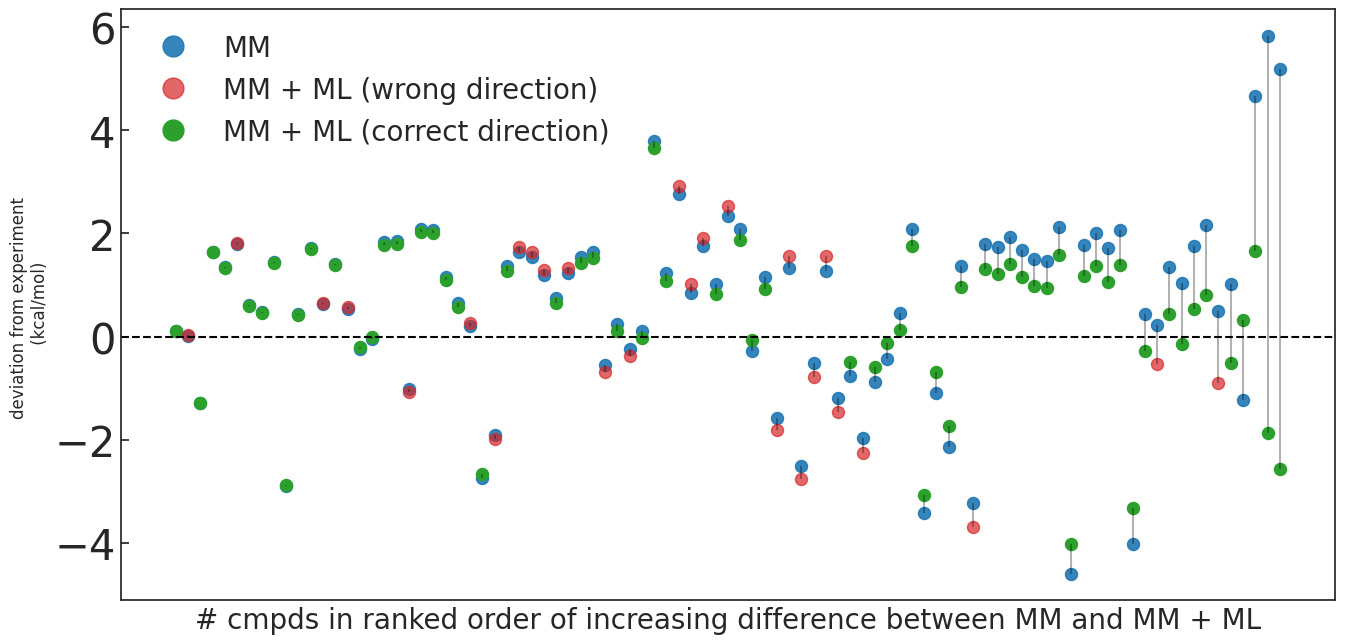

In [8]:
sns.set_theme(
    style="white",
    rc={
        "font.size": 25,
        "legend.fontsize": 20,
        "lines.markersize": 10,
        "xtick.labelsize": 12,
        "ytick.left": True,
        "ytick.direction": "in",
        "ytick.labelsize": 30,
    },
)

plt.rcParams["figure.figsize"] = (14, 7)

data = data.sort_values(by="MM-ML", ascending=True)

wrong = []
correct = []
for index, row in data.iterrows():
    if not np.isnan(data["Exp [kcal/mol]"][index]):
        noCorrection = np.abs(
            data["Exp [kcal/mol]"][index] - data["MM-ASFE [kcal/mol]"][index]
        )
        corrected = np.abs(
            data["Exp [kcal/mol]"][index]
            - data["ML-ASFE [kcal/mol]"][index]
        )
        if np.abs(data["MM-ML"][index]) > 0.001:
            plt.scatter(
                data["Mol_ID"][index],
                (
                    (data["Exp [kcal/mol]"][index] * -1)
                    + data["MM-ASFE [kcal/mol]"][index]
                ),
                s=75,
                # fmt="o",
                # capsize=3,
                # yerr=data["std (TF)"][index],
                color=c1,
                alpha=0.9,
            )

            if noCorrection >= corrected:
                plt.scatter(
                    data["Mol_ID"][index],
                    (
                        (data["Exp [kcal/mol]"][index] * -1)
                        + data["ML-ASFE [kcal/mol]"][index]
                    ),
                    s=75,
                    color=c3,
                )
                correct.append(1)
            else:
                plt.scatter(
                    data["Mol_ID"][index],
                    (
                        (data["Exp [kcal/mol]"][index] * -1)
                        + data["ML-ASFE [kcal/mol]"][index]
                    ),
                    s=75,
                    color=c4,
                    alpha=0.7,
                )
                wrong.append(1)

            plt.vlines(
                x=data["Mol_ID"][index],
                ymin=(
                    (data["Exp [kcal/mol]"][index] * -1)
                    + data["MM-ASFE [kcal/mol]"][index]
                ),
                ymax=(
                    (data["Exp [kcal/mol]"][index] * -1)
                    + data["ML-ASFE [kcal/mol]"][index]
                ),
                colors="black",
                alpha=0.3,
            )


blue_patch = matplotlib.lines.Line2D(
    [0], [0], marker="o", color=c1, label="MM", ls="None", alpha=0.9, ms=15
)
red_patch = matplotlib.lines.Line2D(
    [0],
    [0],
    marker="o",
    color=c4,
    label="MM + ML (wrong direction)",
    alpha=0.7,
    ls="None",
    ms=15,
)
green_patch = matplotlib.lines.Line2D(
    [0],
    [0],
    marker="o",
    color=c3,
    label="MM + ML (correct direction)",
    ls="None",
    ms=15,
)

plt.legend(
    handles=[blue_patch, red_patch, green_patch], frameon=False, loc="upper left"
)


plt.axhline(y=0, linestyle="--", color="black")
# plt.axhline(y=-2, linestyle="--", color="black")
# plt.axhline(y=2, linestyle="--", color="black")
plt.xlabel(
    "# cmpds in ranked order of increasing difference between MM and MM + ML",
    fontsize=20,
)
plt.ylabel("deviation from experiment \n (kcal/mol)")
plt.xticks([])
plt.tight_layout()
print(f"Wrong direction: {round(len(wrong)/len(correct+wrong)*100,2)}% of {len(correct+wrong)} compounds")
# plt.savefig("figures/overview.pdf", bbox_inches="tight")

In [9]:
def bootstrap_metric(fct, x_values, y_values, p_value=False):
    bootstrapped_metric = []
    # bootstrap metric to generate test distribution
    for _ in range(1000):
        indices = np.random.choice(
            range(0, len(x_values)), size=len(x_values), replace=True
        )
        x_selection = np.take(x_values, indices)
        y_selection = np.take(y_values, indices)
        if p_value:
            r = fct(x_selection, y_selection)[0]
        else:
            r = fct(x_selection, y_selection)
        bootstrapped_metric.append(r)

    # define 95% CI
    alpha = 5.0
    lower_p = alpha / 2.0
    # get value at or near percentile (take a look at the definition of percentile if
    # you have less than 100 values to make sure you understand what is happening)
    lower = np.percentile(bootstrapped_metric, lower_p)
    upper_p = (100 - alpha) + (alpha / 2.0)
    upper = np.percentile(bootstrapped_metric, upper_p)
    # calculate true mean
    if p_value:
        mean = fct(x_values, y_values)[0]
    else:
        mean = fct(x_values, y_values)
    return mean, lower, upper

def calculate_statistics(x_values, y_values):
    # bootstrap RMSE
    def calc_rmse(x_values, y_values):
        return np.sqrt(mean_squared_error(x_values, y_values))

    rmse_mean, rmse_lower, rmse_upper = bootstrap_metric(calc_rmse, x_values, y_values)
    print(
        f"RMSE:  {round(rmse_mean, 2)} [{round(rmse_lower,2)}, {round(rmse_upper,2)}]"
    )

    # bootstrap MAE
    mae_mean, mae_lower, mae_upper = bootstrap_metric(
        mean_absolute_error, x_values, y_values
    )
    print(f"MAE:  {round(mae_mean, 2)} [{round(mae_lower,2)}, {round(mae_upper,2)}]")

    # bootstrap Pearson
    pearson_mean, pearson_lower, pearson_upper = bootstrap_metric(
        scipy.stats.pearsonr, x_values, y_values, p_value=True
    )
    print(
        f"Pearson correlation:  {round(pearson_mean, 2)} [{round(pearson_lower,2)}, {round(pearson_upper,2)}]"
    )

    # bootstrap Spearman
    spearman_mean, spearman_lower, spearman_upper = bootstrap_metric(
        scipy.stats.spearmanr, x_values, y_values, p_value=True
    )
    print(
        f"Spearman's correlation:  {round(spearman_mean, 2)} [{round(spearman_lower,2)}, {round(spearman_upper,2)}]"
    )

    # bootstrap Kendalltau
    kendall_mean, kendall_lower, kendall_upper = bootstrap_metric(
        scipy.stats.kendalltau, x_values, y_values, p_value=True
    )
    print(
        f"Kendalltau: {round(kendall_mean, 2)} [{round(kendall_lower,2)}, {round(kendall_upper,2)}]"
    )

    return (
        round(rmse_mean, 2),
        round(mae_mean, 2),
        round(pearson_mean, 2),
        round(spearman_mean, 2),
        round(kendall_mean, 2),
    )

In [39]:
data = pd.read_csv("sample_data/EXS_and_UV.csv")
# data=data.dropna(subset=["Crooks correction"]) # if only the 92 molecules in common are of interest
print(f"###### Without Corretion -- pure MM results ######")
calculate_statistics(data["Exp [kcal/mol]"],data["MM-ASFE [kcal/mol]"])
print(f"###### Corrected results ######")
calculate_statistics(data["Exp [kcal/mol]"],data["ML-ASFE [kcal/mol]"])

###### Without Corretion -- pure MM results ######
RMSE:  1.33 [1.22, 1.44]
MAE:  1.01 [0.94, 1.08]
Pearson correlation:  0.95 [0.94, 0.96]
Spearman's correlation:  0.95 [0.93, 0.96]
Kendalltau: 0.81 [0.79, 0.83]
###### Corrected results ######
RMSE:  1.3 [1.2, 1.41]
MAE:  0.98 [0.92, 1.05]
Pearson correlation:  0.96 [0.94, 0.97]
Spearman's correlation:  0.95 [0.94, 0.96]
Kendalltau: 0.82 [0.8, 0.83]


(1.3, 0.98, 0.96, 0.95, 0.82)

In [52]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

In [58]:
data.loc[:, "numRotBonds"] = np.nan
data["MM-ML"]=np.abs(data["MM-ASFE [kcal/mol]"]-data["ML-ASFE [kcal/mol]"])

numRotBonds = {}
for index, row in data.iterrows():
    try:
      smi = row[" SMILES"].strip()
      correction = row["MM-ML"]
      mol = Chem.MolFromSmiles(smi)
      # display(mol)
      rotBonds = rdMolDescriptors.CalcNumRotatableBonds(mol)
      data.loc[index, "numRotBonds"] = rotBonds
      # print(rotBonds)
      try:
          numRotBonds[rotBonds].append(correction)

      except KeyError:
          numRotBonds[rotBonds] = []
          numRotBonds[rotBonds].append(correction)
    except AttributeError:
      pass

In [66]:
data = data.dropna(subset=["numRotBonds"])

580

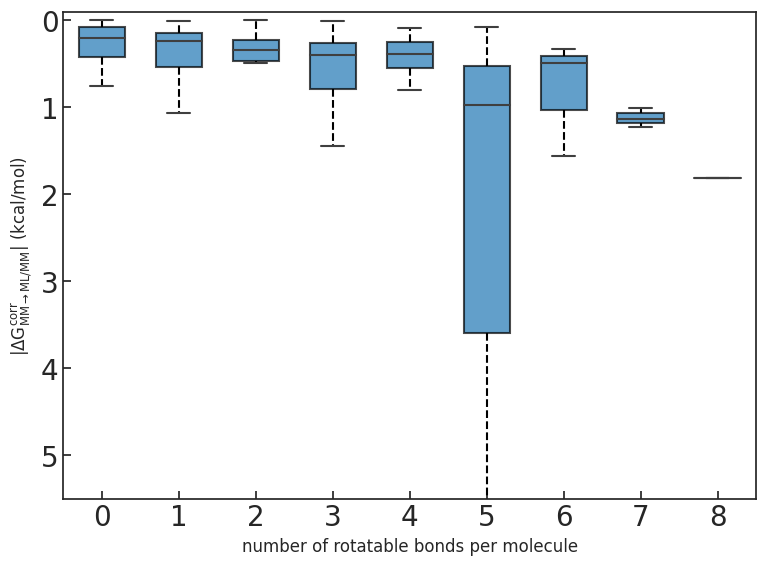

In [87]:
sns.reset_orig
sns.set_theme(
    style="white",
    rc={
        "font.size": 18,
        "legend.fontsize": 10,
        "lines.markersize": 10,
        "xtick.bottom": True,
        "xtick.direction": "in",
        "xtick.labelsize": 20,
        "ytick.left": True,
        "ytick.direction": "in",
        "ytick.labelsize": 20,
    },
)

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.boxplot(
    # data=data,
    x=[int(i) for i in data["numRotBonds"].to_list()],
    y=np.abs(data["Crooks correction"]),
    # hue="Force Field",
    ax=ax1,
    width=0.6,
    # medianprops=medianprops,
    showmeans=False,
    # meanprops=meanprops,
    # order=labeling.index,
    color=c1,
    saturation=1,
    linewidth=1.5,
    # palette={"GAFF": "C1", "CGenFF": "C0"},
    fliersize=12,
    autorange=True,
    # orient="h",
    showfliers=False,
    boxprops=dict(facecolor=c1, alpha=0.7, edgecolor="black", linewidth=1.5),
    whiskerprops=dict(linestyle="--", linewidth=1.5, color="black"),
)

ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel(r"$|\Delta \mathrm{G}^{\mathrm{corr}}_{\mathrm{MM}\rightarrow\mathrm{ML/MM}}|$ (kcal/mol)")
plt.xlabel("number of rotatable bonds per molecule")

plt.ylim([5.5,-0.1])
plt.tight_layout()
# plt.savefig("figures/boxplot_numRotBonds.pdf",bbox_inches='tight')
len(data)